# 1 Author
Darrell Hoffman

# 2 Problem formulation

In this analysis I compare the ability of two different types of neural network (Long Short-Term Memory (LSTM) vs. Convolutional Neural Network (CNN)) to predict which of 8 songs is being hummed or whistled based on extracted audio features. 

I extract these 1-dimensional time series audio features to train a Long Short-Term Memory (LSTM - a type of Recurrent Neural Network) model and determine how accurately the trained model can predict which of the two songs is being hummed or whistled in a validation dataset. Audio recordings of each song from over one hundred different contributing students vary in tone, timing, or loudness of humming or whistling. However, there are certain patterns in rhythm and tone that could distinguish the songs. I decided to explore features from the audio that would capture variation in loudness throughout each recording as a proxy for rhythms, and features to capture frequency as a proxy for tones.

In this document I extract these 1-dimensional time series audio features to train a Long Short-Term Memory (LSTM - a type of Recurrent Neural Network) model and determine how accurately the trained model can predict which of the two songs is being hummed or whistled in a validation dataset.

In contrast to the LSTM method, where I extract 1-dimensional time series audio features to train a model, the CNN model will take as input a grid-based mel spectrogram. This is because, while LSTM is well suited to time series analysis, CNN is well suited to data with grid-based topology. Mel spectrograms are represented as grids that have time on the x-axis and mel frequency on the y-axis. I will describe the CNN model and mel spectrograms in more detail in the following sections.

In this document I extract mel spectrograms to train a CNN model to which of 8 songs is being hummed or whistled. I then compare the resulting validation accuracy with those derived using my Basic Solution.

# 3 Machine Learning pipeline 

## LSTM

1. Data Preparation: Download the dataset and create dataframe linking song labels to audio files.
- Input: 824 audio WAV files containing student hum and whistle interpretations of 8 different songs.
- Output: a files variable linking to all of the audio files and a dataframe linking song labels to audio files.

2. Transformations: Extract amplitude envelope, root mean squared energy, zero crossing rate, and short term fourier transform from each audio file and associated song label.
- Input: audio files, dataframe
- Transformations: extract audio signal and frame size > extract amplitude envelope (maximum energy for each frame), root mean squared energy, and zero crossing rate (the rate at which the signal crosses the horizontal axis - a simple proxy for frequency)
- Output: amplitude envelope, rms energy and zero crossing rate data for each file, label for each file.

3. Build LSTM model.

4. Train LSTM model with validation accuracy computed at each epoch.
- Input: training dataset audio features and labels, validation dataset audio features and labels
- Output: trained LSTM model with optimized validation accuracy

5. Evaluate model based on validation accuracy and confusion matrix.

## CNN

1. Data Preparation: Download the dataset and create dataframe linking song labels to audio files.
- Input: 3220 audio WAV files containing student hum and whistle interpretations of 8 different songs.
- Output: a files variable linking to all of the audio files and a dataframe linking song labels to audio files.

2. Transformations: Extract a mel spectrogram from each audio file and associated song label.
- Input: audio files, dataframe
- Transformations: extract audio signal and frame size > extract a short time fourier transform, convert amplitude to decibels, choose a number of mel bands, construct mel filter banks, and apply the filter to the spectrogram
- Output: mel spectrogram data for each file, numbered label for each file.

3. Build CNN model.

4. Train CNN model with training dataset.
- Input: training dataset mel spectrograms and labels
- Output: trained CNN model

5. Determine validation accuracy of model with validation dataset.
- Input: trained CNN model and validation dataset mel spectrograms and labels
- Output: validation accuracy metric.

6. Evaluate model based on validation accuracy in comparison to the LSTM model performance.

For this Analysis, I followed this tutorial:
https://towardsdatascience.com/audio-deep-learning-made-simple-sound-classification-step-by-step-cebc936bbe5

# 4 Transformation stage

##LSTM

In the transformation stage, I extracted the following features from each audio file: amplitude envelope - maximum power time series data; root mean squared energy - root mean squared power time series data; zero crossing rate - measure of dominant frequency in signal. Each feature was extracted from a frame of a certain length of time.

Amplitude envelope is a measure of the maximum power or loudness of the signal in each frame. I extracted this feature to try to capture any consistent patterns in loudness over time that differ between songs. This measure is sensitive to outliers because it takes into account only the maximum energy of all the samples in a frame.

Root mean squared energy is, as it sounds, the root mean squared energy of all the samples in a frame. It therefore less sensitive than amplitude envelope to outliers, but provided a second measure of loudness to approximate patterns in rhythm.

Zero crossing rate measures the number of times a signal (sine wave) crosses the horizontal axis. In otherwords, zero crossing rate is the rate at which the amplitude of a signal changes from positive to negative or from negative to positive.

From each audio file, I used the librosa library to extract an audio signal and sampling rate and used these as input into a series of functions to output the desired audio features. 

The output audio features defined above were output as list of all three features at each time frame and each list (representing one time frame) was combined in an array and used as input to the model described in the next section. A second array contained the labels for which song was being interpreted in each audio file of the dataset.

##CNN

In the transformation stage I extract mel spectrograms from the audio files.

A spectrogram shows the presence of certain frequencies at a certain time. Since we perceive tones logarithmically compared to their frequencies.  Mel spectrograms represent every doubling of frequency with the same distance on the y-axis of the spectrogram to match hearing perception. Extracting a mel spectrogram from an audio file requires the following steps: extract a short time fourier transform, convert amplitude to decibels (this produces the spectrogram), choose a number of mel bands (essentially, the number of frequency bins), construct mel filter banks, and apply the filter to the spectrogram.

I used the torchaudio library to extract an audio signal and sampling rate and used these as input to a method from the same library to obtain the mel spectrograms from each file.

After extracting the mel spectrograms I augmented them with functions for time shifting and time and frequency masks.  

The output audio features defined above were output as an array containing the grid-approximation mel spectrogram data. This data was used as input to the model described in the next section. A second array contained labels for which song was being interpreted in each audio file of the dataset.

# 5 Modelling

##LSTM

I implemented a **Long short-term memory (LSTM)** model. LSTM is a type of recurrent neural network (RNN). RNNs contain loops that pass information from one step of the network to the next as a type of 'memory' that can inform what is being observed at one stage in a time series, based on what happened previously. LSTMs overcome a limitation of normal RNNs. LSTMs can 'remember' long-term dependencies that RNNs cannot.

LSTMs contain repeating modules of neural network in a chain. The repeating module contains four network layers that interact with a 'cell state' that moves through the chain with only minor linear interactions so information can pass along the cell state mostly unchanged. First, a sigmoid 'forget gate' layer outputs a value between 0 and 1 for each value in the cell state, based on the input and output from the module. A 1 means keep the value, 0 means forget the value. A second sigmoid 'input gate' layer determines which values to update and a tanh layer creates a vector of new possible values. These values are incorporated into the cell state before a final sigmoid 'output gate' layer determines which parts of the cell state to output and a tanh layer adjusts the values to between -1 and 1.

This functionality means LSTMs can selectively remember patterns over longer periods, making them adept at sequence prediction problems such as classifying these 1-dimensional time series features.

##CNN

I implemented a Convolutional Neural Network (CNN) model. CNNs are adept at processing grid-like data, in this case the mel spectrograms extracted from the audio files. The model contains three types of layers arranged to first detect simpler patterns and then more complex patters. 

A convolutional layer multiplies two matrics: a kernel containing the set of learnable parameters and a second matrix is the restricted portion of the receptive field. This creates a 2D activation map representation of the grid. The kernel is smaller than the input, so fewer parameters are stored to improve the model efficiency. The convolution network also has shared parameters, where the same weights are applied to different inputs, resulting in equivariant representation by which a change to the input will result in the same change to the output.

A pooling layer summarizes outputs for each slice of the representation.

Neurons in a fully connected layer are connected to all neurons in the previous and next layer. This layer helps map the representation between input and output through matrix multiplication and a bias effect.

The implementation of a CNN used in this analysis also includes Rectified Linear Unit (ReLU) layers to introduce non-linearity to the activation map after the convolutional layer. 

# 6 Methodology

##LSTM

I shortened all of the time series data to match the length of the shortest sample in the dataset (54 frames). The model performed better with the shortened data compared with data padded to a maximum of 15 seconds.

I split the 3 dimensional by 54 frame array of audio features and the array of labels into training (70%) and validation (30%) sets. Both datasets were input to a LSTM model and run for 200 epochs. I used a sigmoid (finite range with logistic-like curve) initialization, the Adam algorithm as optimizer with a 0.001 learning rate, and a batch size of 32. Adam is a stochastic gradient descent method that is 'computationally efficient' (Kingma et al., 2014).

Validation accuracy was computed for each epoch and the model with the best validation accuracy was saved until the model could be improved further. I computed a confusion matrix from the final model to visualize where the model predictions did not match the validation labels.

##CNN

The set of extracted spectrograms was divided into a training set (80%) and validation set (20%). I then trained the CNN model with the training set for 100 epochs. I used a linear anneal strategy (estimator of global optimum), the Adam algorithm as optimizer with a 0.001 learning rate. Adam is a stochastic gradient descent method that is 'computationally efficient' (Kingma et al., 2014). The model is constructed from 4 convolution blocks, each with increasing batch size from 8 to 64.

Training accuracy was computed for each epoch of the model run. After one hundred epochs, the model was applied to the validation data to determine the validation accuracy. The validation accuracy is then compared with that of an LSTM model trained on time series audio features extracted from the same files.

# 7 Dataset

The dataset is extracted from a subset of the **Mile End Hums and Whistles dataset**, containing all of the available audio files for 8 different songs. In this section I import necessary libraries for processing the data, download the data files, rename the files and create a dataframe linking the files to song name labels, and extract mel spectrograms and visualize one of the files, which is used to train the model in the following section.

**Importing Necessary libraries:**

In [ ]:
from google.colab import drive

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os, sys, re, pickle, glob
import urllib.request
import zipfile

import IPython.display as ipd
from tqdm import tqdm
import librosa

drive.mount('/content/drive')

Mounted at /content/drive


**Downloading zip files containing the audio files:**

In [ ]:
#define a function to download zip files containing audio files
def download_url(url, save_path):
    with urllib.request.urlopen(url) as dl_file:
        with open(save_path, 'wb') as out_file:
            out_file.write(dl_file.read())

In [ ]:
#download and save zip files
url_5  = "https://collect.qmul.ac.uk/down?t=6TD2HDAA73VPCMDQ/45P0544J8OQTL6FNDI5MMJ0"
save_path = '/content/drive/MyDrive/Data/MLENDHW/Panther_1.zip'
download_url(url_5, save_path)

url_6  = "https://collect.qmul.ac.uk/down?t=4PU1F15RLTG3FU0L/4HVMCJUKGNR9MM5MKJ1AU28"
save_path = '/content/drive/MyDrive/Data/MLENDHW/Panther_2.zip'
download_url(url_6, save_path)

In [ ]:
url_7  = "https://collect.qmul.ac.uk/down?t=554IPCID7NP9INLV/6L52BFT4AN3AMQ46JJPPIEG"
save_path = '/content/drive/MyDrive/Data/MLENDHW/Rain_1.zip'
download_url(url_7, save_path)

url_8  = "https://collect.qmul.ac.uk/down?t=451TRM8MUGTT51F6/4PU0H6CQBVEB2OLTLB7AA3G"
save_path = '/content/drive/MyDrive/Data/MLENDHW/Rain_2.zip'
download_url(url_8, save_path)

In [ ]:
url_9  = "https://collect.qmul.ac.uk/down?t=554DNT8AV0VTD6FQ/659ITCLHC39RGUSLHNK888G"
save_path = '/content/drive/MyDrive/Data/MLENDHW/Hakuna_1.zip'
download_url(url_9, save_path)

url_10  = "https://collect.qmul.ac.uk/down?t=6T7IVC2F6FI8MJ59/6P0DBMAQ3SEF38NTDE06QJG"
save_path = '/content/drive/MyDrive/Data/MLENDHW/Hakuna_2.zip'
download_url(url_10, save_path)

In [ ]:
url_11  = "https://collect.qmul.ac.uk/down?t=6LE0D6QK6RSP0HT4/6PE2HDDUEFGBAPK0S4SD1TO"
save_path = '/content/drive/MyDrive/Data/MLENDHW/Mamma_1.zip'
download_url(url_11, save_path)

url_12  = "https://collect.qmul.ac.uk/down?t=450D9NGHU4JCR0N3/4LUH37C69F4AQRK9JVVERJ8"
save_path = '/content/drive/MyDrive/Data/MLENDHW/Mamma_2.zip'
download_url(url_12, save_path)

In [ ]:
url_13  = "https://collect.qmul.ac.uk/down?t=59S1H7AI63JOSGD2/55VHB34NBBCRSVCRGJJ8IA8"
save_path = '/content/drive/MyDrive/Data/MLENDHW/Showman_1.zip'
download_url(url_13, save_path)

url_14  = "https://collect.qmul.ac.uk/down?t=6PEJ9BQ04BAROSSG/4LO133SK8KRDN67NDM5MAJ0"
save_path = '/content/drive/MyDrive/Data/MLENDHW/Showman_2.zip'
download_url(url_14, save_path)

In [ ]:
url_15  = "https://collect.qmul.ac.uk/down?t=6P4DTGJTDMH4I3JF/6TDIH3CMBFCBQVKOH7NPU10"
save_path = '/content/drive/MyDrive/Data/MLENDHW/Frozen_1.zip'
download_url(url_15, save_path)

url_16  = "https://collect.qmul.ac.uk/down?t=619232L5GL523LHN/659I70F2IU26IAI5RGPDTVG"
save_path = '/content/drive/MyDrive/Data/MLENDHW/Frozen_2.zip'
download_url(url_16, save_path)

**Extract audio files from zip files and save to new folders for each song. Declare files as list of file paths to original audio files:**

In [ ]:
#extract audio files from zip files
directory_to_extract_hp = '/content/drive/MyDrive/Data/MLENDHW/advanced/Potter/'

zip_path = '/content/drive/MyDrive/Data/MLENDHW/Potter_1.zip'
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(directory_to_extract_hp)

zip_path_2 = '/content/drive/MyDrive/Data/MLENDHW/Potter_2.zip'
with zipfile.ZipFile(zip_path_2, 'r') as zip_ref:
    zip_ref.extractall(directory_to_extract_hp)

directory_to_extract_sw = '/content/drive/MyDrive/Data/MLENDHW/advanced/StarWars/'

zip_path_3 = '/content/drive/MyDrive/Data/MLENDHW/StarWars_1.zip'
with zipfile.ZipFile(zip_path_3, 'r') as zip_ref:
    zip_ref.extractall(directory_to_extract_sw)

zip_path_4 = '/content/drive/MyDrive/Data/MLENDHW/StarWars_2.zip'
with zipfile.ZipFile(zip_path_4, 'r') as zip_ref:
    zip_ref.extractall(directory_to_extract_sw)

directory_to_extract_pa = '/content/drive/MyDrive/Data/MLENDHW/advanced/Panther/'

zip_path_5 = '/content/drive/MyDrive/Data/MLENDHW/Panther_1.zip'
with zipfile.ZipFile(zip_path_5, 'r') as zip_ref:
    zip_ref.extractall(directory_to_extract_pa)

zip_path_6 = '/content/drive/MyDrive/Data/MLENDHW/Panther_2.zip'
with zipfile.ZipFile(zip_path_6, 'r') as zip_ref:
    zip_ref.extractall(directory_to_extract_pa)

directory_to_extract_ra = '/content/drive/MyDrive/Data/MLENDHW/advanced/Rain/'

zip_path_7 = '/content/drive/MyDrive/Data/MLENDHW/Rain_1.zip'
with zipfile.ZipFile(zip_path_7, 'r') as zip_ref:
    zip_ref.extractall(directory_to_extract_ra)

zip_path_8 = '/content/drive/MyDrive/Data/MLENDHW/Rain_2.zip'
with zipfile.ZipFile(zip_path_8, 'r') as zip_ref:
    zip_ref.extractall(directory_to_extract_ra)


directory_to_extract_ha = '/content/drive/MyDrive/Data/MLENDHW/advanced/Hakuna/'

zip_path_9 = '/content/drive/MyDrive/Data/MLENDHW/Hakuna_1.zip'
with zipfile.ZipFile(zip_path_9, 'r') as zip_ref:
    zip_ref.extractall(directory_to_extract_ha)

zip_path_10 = '/content/drive/MyDrive/Data/MLENDHW/Hakuna_2.zip'
with zipfile.ZipFile(zip_path_10, 'r') as zip_ref:
    zip_ref.extractall(directory_to_extract_ha)

directory_to_extract_ma = '/content/drive/MyDrive/Data/MLENDHW/advanced/Mamma/'

zip_path_11 = '/content/drive/MyDrive/Data/MLENDHW/Mamma_1.zip'
with zipfile.ZipFile(zip_path_11, 'r') as zip_ref:
    zip_ref.extractall(directory_to_extract_ma)

zip_path_12 = '/content/drive/MyDrive/Data/MLENDHW/Mamma_2.zip'
with zipfile.ZipFile(zip_path_12, 'r') as zip_ref:
    zip_ref.extractall(directory_to_extract_ma)

directory_to_extract_sh = '/content/drive/MyDrive/Data/MLENDHW/advanced/Showman/'

zip_path_13 = '/content/drive/MyDrive/Data/MLENDHW/Showman_1.zip'
with zipfile.ZipFile(zip_path_13, 'r') as zip_ref:
    zip_ref.extractall(directory_to_extract_sh)

zip_path_14 = '/content/drive/MyDrive/Data/MLENDHW/Showman_2.zip'
with zipfile.ZipFile(zip_path_14, 'r') as zip_ref:
    zip_ref.extractall(directory_to_extract_sh)

directory_to_extract_fr = '/content/drive/MyDrive/Data/MLENDHW/advanced/Frozen/'

zip_path_15 = '/content/drive/MyDrive/Data/MLENDHW/Frozen_1.zip'
with zipfile.ZipFile(zip_path_15, 'r') as zip_ref:
    zip_ref.extractall(directory_to_extract_fr)

zip_path_16 = '/content/drive/MyDrive/Data/MLENDHW/Frozen_2.zip'
with zipfile.ZipFile(zip_path_16, 'r') as zip_ref:
    zip_ref.extractall(directory_to_extract_fr)


files_hp = glob.glob('/content/drive/MyDrive/Data/MLENDHW/advanced/Potter/*.wav')
files_sw = glob.glob('/content/drive/MyDrive/Data/MLENDHW/advanced/StarWars/*.wav')
files_pa = glob.glob('/content/drive/MyDrive/Data/MLENDHW/advanced/Panther/*.wav')
files_ra = glob.glob('/content/drive/MyDrive/Data/MLENDHW/advanced/Rain/*.wav')
files_ha = glob.glob('/content/drive/MyDrive/Data/MLENDHW/advanced/Hakuna/*.wav')
files_ma = glob.glob('/content/drive/MyDrive/Data/MLENDHW/advanced/Mamma/*.wav')
files_sh = glob.glob('/content/drive/MyDrive/Data/MLENDHW/advanced/Showman/*.wav')
files_fr = glob.glob('/content/drive/MyDrive/Data/MLENDHW/advanced/Frozen/*.wav')

**Rename and Re-declare file paths:**

I decided to rename all of the files to a consistent format containing only the participant ID, and the song name and attaching a unique file number to each audio file. 

In [ ]:
#RENAME POTTER FILES
for file_num in range(0, len(files_hp)):
    participant_ID = files_hp[file_num].split('/')[-1].split('_')[0]
    new_name = f"{'/'.join(files_hp[file_num].split('/')[:-1])}/{file_num}_{participant_ID}_Potter.wav"
    os.rename(files_hp[file_num], new_name)

In [ ]:
#RENAME STARWARS FILES
for file_num in range(0, len(files_sw)):
    participant_ID = files_sw[file_num].split('/')[-1].split('_')[0]
    new_name = f"{'/'.join(files_sw[file_num].split('/')[:-1])}/{file_num}_{participant_ID}_Starwars.wav"
    os.rename(files_sw[file_num], new_name)

In [ ]:
#RENAME PANTHER FILES
for file_num in range(0, len(files_pa)):
    participant_ID = files_sw[file_num].split('/')[-1].split('_')[0]
    new_name = f"{'/'.join(files_pa[file_num].split('/')[:-1])}/{file_num}_{participant_ID}_Panther.wav"
    os.rename(files_pa[file_num], new_name)

In [ ]:
#RENAME RAIN FILES
for file_num in range(0, len(files_ra)):
    participant_ID = files_ra[file_num].split('/')[-1].split('_')[0]
    new_name = f"{'/'.join(files_ra[file_num].split('/')[:-1])}/{file_num}_{participant_ID}_Rain.wav"
    os.rename(files_ra[file_num], new_name)

In [ ]:
#RENAME HAKUNA FILES
for file_num in range(0, len(files_ha)):
    participant_ID = files_ha[file_num].split('/')[-1].split('_')[0]
    new_name = f"{'/'.join(files_ha[file_num].split('/')[:-1])}/{file_num}_{participant_ID}_Hakuna.wav"
    os.rename(files_ha[file_num], new_name)

In [ ]:
#RENAME MAMMA FILES
for file_num in range(0, len(files_ma)):
    participant_ID = files_ma[file_num].split('/')[-1].split('_')[0]
    new_name = f"{'/'.join(files_ma[file_num].split('/')[:-1])}/{file_num}_{participant_ID}_Mamma.wav"
    os.rename(files_ma[file_num], new_name)

In [ ]:
#RENAME SHOWMAN FILES
for file_num in range(0, len(files_sh)):
    participant_ID = files_sh[file_num].split('/')[-1].split('_')[0]
    new_name = f"{'/'.join(files_sh[file_num].split('/')[:-1])}/{file_num}_{participant_ID}_Showman.wav"
    os.rename(files_sh[file_num], new_name)

In [ ]:
#RENAME FROZEN FILES
for file_num in range(0, len(files_fr)):
    participant_ID = files_fr[file_num].split('/')[-1].split('_')[0]
    new_name = f"{'/'.join(files_fr[file_num].split('/')[:-1])}/{file_num}_{participant_ID}_Frozen.wav"
    os.rename(files_fr[file_num], new_name)

In [ ]:
files_hp = glob.glob('/content/drive/MyDrive/Data/MLENDHW/advanced/Potter/*.wav')
files_sw = glob.glob('/content/drive/MyDrive/Data/MLENDHW/advanced/StarWars/*.wav')
files_pa = glob.glob('/content/drive/MyDrive/Data/MLENDHW/advanced/Panther/*.wav')
files_ra = glob.glob('/content/drive/MyDrive/Data/MLENDHW/advanced/Rain/*.wav')
files_ha = glob.glob('/content/drive/MyDrive/Data/MLENDHW/advanced/Hakuna/*.wav')
files_ma = glob.glob('/content/drive/MyDrive/Data/MLENDHW/advanced/Mamma/*.wav')
files_sh = glob.glob('/content/drive/MyDrive/Data/MLENDHW/advanced/Showman/*.wav')
files_fr = glob.glob('/content/drive/MyDrive/Data/MLENDHW/advanced/Frozen/*.wav')

**Move all of the files to one folder and assign the path to all files as one variable:**

In [ ]:
#Move files to one folder
import shutil

for file in files_hp:
    shutil.move(file, '/content/drive/MyDrive/Data/MLENDHW/advanced')

for file in files_sw:
    shutil.move(file, '/content/drive/MyDrive/Data/MLENDHW/advanced')

for file in files_pa:
    shutil.move(file, '/content/drive/MyDrive/Data/MLENDHW/advanced')

for file in files_ra:
    shutil.move(file, '/content/drive/MyDrive/Data/MLENDHW/advanced')

for file in files_ha:
    shutil.move(file, '/content/drive/MyDrive/Data/MLENDHW/advanced')

for file in files_ma:
    shutil.move(file, '/content/drive/MyDrive/Data/MLENDHW/advanced')

for file in files_sh:
    shutil.move(file, '/content/drive/MyDrive/Data/MLENDHW/advanced')

for file in files_fr:
    shutil.move(file, '/content/drive/MyDrive/Data/MLENDHW/advanced')

In [ ]:
#declare single list of file paths for all audio files
files = glob.glob('/content/drive/MyDrive/Data/MLENDHW/advanced/*.wav')

**Create a dataframe containing all of the file names, participant ID and the song name for each audio file in teh dataset:**

In [ ]:
#Create a data frame of file data
All_Songs_table = [] 

for file in files:
  file_name = file.split('/')[-1]
  song = file.split('/')[-1].split('_')[-1].split('.')[0]
  participant_ID = file.split('/')[-1].split('_')[1]
  All_Songs_table.append([file_name, participant_ID, song])

All_Songs_df = pd.DataFrame(All_Songs_table,columns=['file_id', 'participant_ID', 'song'])

def number_songs(song_id):
  song_dict = {'Potter':1, 'Starwars':2, 'Panther':3, 'Rain':4, 'Hakuna':5, 'Mamma':6, 'Showman':7, 'Frozen':8}

  return song_dict[song_id.song]

All_Songs_df = All_Songs_df.assign(song_num = All_Songs_df.apply(number_songs, axis=1))
All_Songs_df

file_id participant_ID    song  song_num
0        0_S43_Potter.wav            S43  Potter         1
1        1_S43_Potter.wav            S43  Potter         1
2        2_S44_Potter.wav            S44  Potter         1
3        3_S44_Potter.wav            S44  Potter         1
4        4_S45_Potter.wav            S45  Potter         1
...                   ...            ...     ...       ...
3215  405_S219_Frozen.wav           S219  Frozen         8
3216  406_S221_Frozen.wav           S221  Frozen         8
3217  407_S221_Frozen.wav           S221  Frozen         8
3218  408_S222_Frozen.wav           S222  Frozen         8
3219  409_S222_Frozen.wav           S222  Frozen         8

[3220 rows x 4 columns]

**Visualize the mel spectrogram for the first audio signal in the dataset:**

The whistled sample generally has a higher frequency than the hummed sample, and there seem to be some differences in pattern along the time axis for the two songs. It is not clear from the images whether it is the difference in the tune or the student's interpretation that is driving these differences.

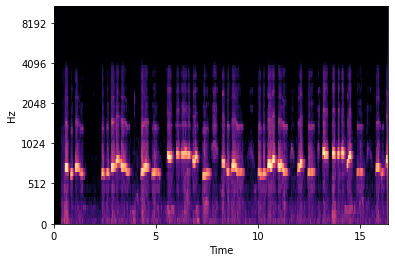

In [ ]:
fs=None

x, fs = librosa.load(files[101],sr=fs)

mel_spec_x = librosa.feature.melspectrogram(x, n_fft=2048, sr=22050, hop_length=1024 , n_mels=64)
log_mel_spec_x = librosa.power_to_db(mel_spec_x)

import librosa.display

librosa.display.specshow(log_mel_spec_x, x_axis='time', y_axis='mel')
plt.show()
display(ipd.Audio(files[101]))

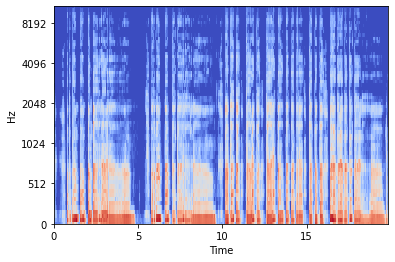

In [ ]:
fs=None

x, fs = librosa.load(files[500],sr=fs)

mel_spec_x = librosa.feature.melspectrogram(x, n_fft=2048, sr=22050, hop_length=1024 , n_mels=64)
log_mel_spec_x = librosa.power_to_db(mel_spec_x)

import librosa.display

librosa.display.specshow(log_mel_spec_x, x_axis='time', y_axis='mel')
plt.show()
display(ipd.Audio(files[500]))

**Data Preparation - import libraries, convert audio to stereo, ensure sampling rate consistent amongst files, resize all files to the same length, time shift the signals, generate mel spectrograms, and apply time and frequency masks.**

In [ ]:
import math, random
import torch
import torchaudio
from torchaudio import transforms
from IPython.display import Audio

class AudioUtil():

# Load a file. Return the signal and sample rate

  @staticmethod
  def open(audio_file):
    signal, sr = torchaudio.load(audio_file)
    return (signal, sr)

  # ----------------------------
  # Convert the given audio to the desired number of channels
  # ----------------------------
  @staticmethod
  def rechannel(aud, new_channel):
    signal, sr = aud

    if (signal.shape[0] == new_channel):
      # Nothing to do
      return aud

    if (new_channel == 1):
      # Convert from stereo to mono by selecting only the first channel
      resig = signal[:1, :]
    else:
      # Convert from mono to stereo by duplicating the first channel
      resig = torch.cat([signal, signal])

    return ((resig, sr))
    
  # ----------------------------
  # Since Resample applies to a single channel, we resample one channel at a time
  # ----------------------------
  @staticmethod
  def resample(aud, newsr):
    signal, sr = aud

    if (sr == newsr):
      # Nothing to do
      return aud

    num_channels = signal.shape[0]
    # Resample first channel
    resig = torchaudio.transforms.Resample(sr, newsr)(signal[:1,:])
    if (num_channels > 1):
      # Resample the second channel and merge both channels
      retwo = torchaudio.transforms.Resample(sr, newsr)(signal[1:,:])
      resig = torch.cat([resig, retwo])

    return ((resig, newsr))


  # ----------------------------
  # Pad (or truncate) the signal to a fixed length 'max_ms' in milliseconds
  # ----------------------------
  @staticmethod
  def pad_trunc(aud, max_ms):
    signal, sr = aud
    num_rows, sig_len = signal.shape
    max_len = sr//1000 * max_ms

    if (sig_len > max_len):
      # Truncate the signal to the given length
      signal = signal[:,:max_len]

    elif (sig_len < max_len):
      # Length of padding to add at the beginning and end of the signal
      pad_begin_len = random.randint(0, max_len - sig_len)
      pad_end_len = max_len - sig_len - pad_begin_len

      # Pad with 0s
      pad_begin = torch.zeros((num_rows, pad_begin_len))
      pad_end = torch.zeros((num_rows, pad_end_len))

      signal = torch.cat((pad_begin, signal, pad_end), 1)
      
    return (signal, sr)

  # ----------------------------
  # Shifts the signal to the left or right by some percent. Values at the end
  # are 'wrapped around' to the start of the transformed signal.
  # ----------------------------
  @staticmethod
  def time_shift(aud, shift_limit):
    signal, sr = aud
    _, sig_len = signal.shape
    shift_amt = int(random.random() * shift_limit * sig_len)
    return (signal.roll(shift_amt), sr)


  # ----------------------------
  # Generate a Spectrogram
  # ----------------------------
  @staticmethod
  def spectro_gram(aud, n_mels=64, n_fft=1024, hop_len=None):
    signal ,sr = aud
    top_db = 80

    # spec has shape [channel, n_mels, time], where channel is mono, stereo etc
    spec = transforms.MelSpectrogram(sr, n_fft=n_fft, hop_length=hop_len, n_mels=n_mels)(signal)

    # Convert to decibels
    spec = transforms.AmplitudeToDB(top_db=top_db)(spec)
    return (spec)


  # ----------------------------
  # Augment the Spectrogram by masking out some sections of it in both the frequency
  # dimension (ie. horizontal bars) and the time dimension (vertical bars) to prevent
  # overfitting and to help the model generalise better. The masked sections are
  # replaced with the mean value.
  # ----------------------------
  @staticmethod
  def spectro_augment(spec, max_mask_pct=0.1, n_freq_masks=1, n_time_masks=1):
    _, n_mels, n_steps = spec.shape
    mask_value = spec.mean()
    aug_spec = spec

    freq_mask_param = max_mask_pct * n_mels
    for _ in range(n_freq_masks):
      aug_spec = transforms.FrequencyMasking(freq_mask_param)(aug_spec, mask_value)

    time_mask_param = max_mask_pct * n_steps
    for _ in range(n_time_masks):
      aug_spec = transforms.TimeMasking(time_mask_param)(aug_spec, mask_value)

    return aug_spec

In [ ]:
data_path = '/content/drive/MyDrive/Data/MLENDHW/advanced/'

In [ ]:
from torch.utils.data import DataLoader, Dataset, random_split
import torchaudio

# ----------------------------
# Sound Dataset
# ----------------------------
class SoundDS(Dataset):
  def __init__(self, df, data_path):
    self.df = df
    self.data_path = str(data_path)
    self.duration = 4000
    self.sr = 44100
    self.channel = 2
    self.shift_pct = 0.4
            
  # ----------------------------
  # Number of items in dataset
  # ----------------------------
  def __len__(self):
    return len(self.df)    
    
  # ----------------------------
  # Get i'th item in dataset
  # ----------------------------
  def __getitem__(self, idx):
    # Absolute file path of the audio file - concatenate the audio directory with
    # the relative path
    audio_file = self.data_path + self.df.loc[idx, 'file_id']
    # Get the Class ID
    class_id = self.df.loc[idx, 'song_num']

    aud = AudioUtil.open(audio_file)
    # Some sounds have a higher sample rate, or fewer channels compared to the
    # majority. So make all sounds have the same number of channels and same 
    # sample rate. Unless the sample rate is the same, the pad_trunc will still
    # result in arrays of different lengths, even though the sound duration is
    # the same.
    reaud = AudioUtil.resample(aud, self.sr)
    rechan = AudioUtil.rechannel(reaud, self.channel)

    dur_aud = AudioUtil.pad_trunc(rechan, self.duration)
    shift_aud = AudioUtil.time_shift(dur_aud, self.shift_pct)
    sgram = AudioUtil.spectro_gram(shift_aud, n_mels=64, n_fft=1024, hop_len=None)
    aug_sgram = AudioUtil.spectro_augment(sgram, max_mask_pct=0.1, n_freq_masks=2, n_time_masks=2)

    return aug_sgram, class_id

# 8 Results

**Split the data into training and validation sets:**

In [ ]:
from torch.utils.data import random_split

myds = SoundDS(All_Songs_df, data_path)

# Random split of 80:20 between training and validation
num_items = len(myds)
num_train = round(num_items * 0.8)
num_val = num_items - num_train
train_ds, val_ds = random_split(myds, [num_train, num_val])

# Create training and validation data loaders
train_dl = torch.utils.data.DataLoader(train_ds, batch_size=16, shuffle=True)
val_dl = torch.utils.data.DataLoader(val_ds, batch_size=16, shuffle=False)

**Define the CNN model:**

In [ ]:
import torch.nn as nn
import torch.nn.functional as F
from torch.nn import init

# ----------------------------
# Audio Classification Model
# ----------------------------
class AudioClassifier (nn.Module):
    # ----------------------------
    # Build the model architecture
    # ----------------------------
    def __init__(self):
        super().__init__()
        conv_layers = []

        # First Convolution Block with Relu and Batch Norm. Use Kaiming Initialization
        self.conv1 = nn.Conv2d(2, 8, kernel_size=(5, 5), stride=(2, 2), padding=(2, 2))
        self.relu1 = nn.ReLU()
        self.bn1 = nn.BatchNorm2d(8)
        init.kaiming_normal_(self.conv1.weight, a=0.1)
        self.conv1.bias.data.zero_()
        conv_layers += [self.conv1, self.relu1, self.bn1]

        # Second Convolution Block
        self.conv2 = nn.Conv2d(8, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
        self.relu2 = nn.ReLU()
        self.bn2 = nn.BatchNorm2d(16)
        init.kaiming_normal_(self.conv2.weight, a=0.1)
        self.conv2.bias.data.zero_()
        conv_layers += [self.conv2, self.relu2, self.bn2]

        # Second Convolution Block
        self.conv3 = nn.Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
        self.relu3 = nn.ReLU()
        self.bn3 = nn.BatchNorm2d(32)
        init.kaiming_normal_(self.conv3.weight, a=0.1)
        self.conv3.bias.data.zero_()
        conv_layers += [self.conv3, self.relu3, self.bn3]

        # Second Convolution Block
        self.conv4 = nn.Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
        self.relu4 = nn.ReLU()
        self.bn4 = nn.BatchNorm2d(64)
        init.kaiming_normal_(self.conv4.weight, a=0.1)
        self.conv4.bias.data.zero_()
        conv_layers += [self.conv4, self.relu4, self.bn4]

        # Linear Classifier
        self.ap = nn.AdaptiveAvgPool2d(output_size=1)
        self.lin = nn.Linear(in_features=64, out_features=10)

        # Wrap the Convolutional Blocks
        self.conv = nn.Sequential(*conv_layers)
 
    # ----------------------------
    # Forward pass computations
    # ----------------------------
    def forward(self, x):
        # Run the convolutional blocks
        x = self.conv(x)

        # Adaptive pool and flatten for input to linear layer
        x = self.ap(x)
        x = x.view(x.shape[0], -1)

        # Linear layer
        x = self.lin(x)

        # Final output
        return x

# Create the model and put it on the GPU if available
myModel = AudioClassifier()
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
myModel = myModel.to(device)
# Check that it is on Cuda
next(myModel.parameters()).device

device(type='cpu')

**Train the model:**

In [ ]:
# ----------------------------
# Training Loop
# ----------------------------
def training(model, train_dl, num_epochs):
  # Loss Function, Optimizer and Scheduler
  criterion = nn.CrossEntropyLoss()
  optimizer = torch.optim.Adam(model.parameters(),lr=0.001)
  scheduler = torch.optim.lr_scheduler.OneCycleLR(optimizer, max_lr=0.001,
                                                steps_per_epoch=int(len(train_dl)),
                                                epochs=num_epochs,
                                                anneal_strategy='linear')

  # Repeat for each epoch
  for epoch in range(num_epochs):
    running_loss = 0.0
    correct_prediction = 0
    total_prediction = 0

    # Repeat for each batch in the training set
    for i, data in enumerate(train_dl):
      # Get the input features and target labels, and put them on the GPU
      inputs, labels = data[0].to(device), data[1].to(device)

      # Normalize the inputs
      inputs_m, inputs_s = inputs.mean(), inputs.std()
      inputs = (inputs - inputs_m) / inputs_s

      # Zero the parameter gradients
      optimizer.zero_grad()

      # forward + backward + optimize
      outputs = model(inputs)
      loss = criterion(outputs, labels)
      loss.backward()
      optimizer.step()
      scheduler.step()

      # Keep stats for Loss and Accuracy
      running_loss += loss.item()

      # Get the predicted class with the highest score
      _, prediction = torch.max(outputs,1)
      # Count of predictions that matched the target label
      correct_prediction += (prediction == labels).sum().item()
      total_prediction += prediction.shape[0]

      #if i % 10 == 0:    # print every 10 mini-batches
      #    print('[%d, %5d] loss: %.3f' % (epoch + 1, i + 1, running_loss / 10))
    
    # Print stats at the end of the epoch
    num_batches = len(train_dl)
    avg_loss = running_loss / num_batches
    acc = correct_prediction/total_prediction
    print(f'Epoch: {epoch}, Loss: {avg_loss:.2f}, Accuracy: {acc:.2f}')

  print('Finished Training')
  
num_epochs=100 
training(myModel, train_dl, num_epochs)

Epoch: 0, Loss: 2.32, Accuracy: 0.11
Epoch: 1, Loss: 2.30, Accuracy: 0.12
Epoch: 2, Loss: 2.27, Accuracy: 0.15
Epoch: 3, Loss: 2.24, Accuracy: 0.17
Epoch: 4, Loss: 2.18, Accuracy: 0.18
Epoch: 5, Loss: 2.12, Accuracy: 0.19
Epoch: 6, Loss: 2.08, Accuracy: 0.20
Epoch: 7, Loss: 2.04, Accuracy: 0.22
Epoch: 8, Loss: 2.01, Accuracy: 0.23
Epoch: 9, Loss: 1.99, Accuracy: 0.25
Epoch: 10, Loss: 1.97, Accuracy: 0.24
Epoch: 11, Loss: 1.94, Accuracy: 0.27
Epoch: 12, Loss: 1.91, Accuracy: 0.28
Epoch: 13, Loss: 1.89, Accuracy: 0.29
Epoch: 14, Loss: 1.87, Accuracy: 0.30
Epoch: 15, Loss: 1.86, Accuracy: 0.29
Epoch: 16, Loss: 1.83, Accuracy: 0.32
Epoch: 17, Loss: 1.81, Accuracy: 0.31
Epoch: 18, Loss: 1.79, Accuracy: 0.35
Epoch: 19, Loss: 1.77, Accuracy: 0.35
Epoch: 20, Loss: 1.74, Accuracy: 0.36
Epoch: 21, Loss: 1.74, Accuracy: 0.37
Epoch: 22, Loss: 1.72, Accuracy: 0.37
Epoch: 23, Loss: 1.71, Accuracy: 0.37
Epoch: 24, Loss: 1.68, Accuracy: 0.39
Epoch: 25, Loss: 1.64, Accuracy: 0.41
Epoch: 26, Loss: 1.63,

**Run the model on the validation dataset and find validation accuracy:**

In [ ]:
# ----------------------------
# Inference
# ----------------------------
def inference (model, val_dl):
  correct_prediction = 0
  total_prediction = 0

  # Disable gradient updates
  with torch.no_grad():
    for data in val_dl:
      # Get the input features and target labels, and put them on the GPU
      inputs, labels = data[0].to(device), data[1].to(device)

      # Normalize the inputs
      inputs_m, inputs_s = inputs.mean(), inputs.std()
      inputs = (inputs - inputs_m) / inputs_s

      # Get predictions
      outputs = model(inputs)

      # Get the predicted class with the highest score
      _, prediction = torch.max(outputs,1)
      # Count of predictions that matched the target label
      correct_prediction += (prediction == labels).sum().item()
      total_prediction += prediction.shape[0]
    
  acc = correct_prediction/total_prediction
  print(f'Accuracy: {acc:.2f}, Total items: {total_prediction}')

# Run inference on trained model with the validation set
inference(myModel, val_dl)

Accuracy: 0.53, Total items: 659


The training accuracy was 66% and the validation accuracy was 53%. The model is somewhat overfitting, but 53% accuracy is a large improvement from a randomly guessing model of 12.5%. More than half the time the model is correctly predicting which of the 8 songs is being interpreted by hum or whistle.

# 9 Conclusions

The LSTM model trained on time series features from my Basic Solution performed better than the CNN model trained on mel spectrograms on the 8 song dataset. The training accuracy for the LSTM model was 98.3% and the validation accuracy was 61.5%, 8.5% higher than the CNN model trained on mel spectrograms. The LSTM model also ran much faster than the CNN model (I didn't time the code, but the CNN model took several hours to execute data preparation and run the model, while the data preparation and model run for the LSTM model took less than an hour.)

I spent more time experimenting with the transformations and model parameters for the LSTM model than for the CNN model, so the validation accuracy of the CNN model could potentially be improved by varying the number of mels in the mels spectrograms, removing some of the data augmentations, changing the learning rate and batch sizes.

I would also be interested in exploring the application of the CNN to distinguish hums and whistles and possibly identify which student was interpreting each song in the hum interpretations. The mel spectrograms could be better suited to distinguising types of sounds at certain frequency ranges, rather than identifying a specific tune. Alternatively, a pipeline by which the data was first classified as hum or whistle and divided and then the separated dataset was input to the model to classify songs, might have more success.

# 9 Appendix: LSTM Model

In [ ]:
def extract_time_series_features(signal, frame_size, winLen=0.2):
  p = winLen*frame_size
  frame_length = int(2**int(p-1).bit_length())
  hop_length = frame_length//2  

  amplitude_envelope = [max(signal[i:i+frame_length]) for i in range(0, len(signal), hop_length)]
  rms_energy = librosa.feature.rms(signal, frame_length=frame_length, hop_length=hop_length).tolist()[0]
  zero_crossing_rate = librosa.feature.zero_crossing_rate(signal, frame_length=frame_length, hop_length=hop_length).tolist()[0]

  return amplitude_envelope, rms_energy, zero_crossing_rate

In [ ]:
All_Songs_df = All_Songs_df.set_index('file_id')

In [ ]:
dummy_songs = pd.get_dummies(All_Songs_df['song'])
All_Songs_df = pd.concat([All_Songs_df, dummy_songs], axis=1)
All_Songs_df.head()

participant_ID    song  song_num  ...  Rain  Showman  Starwars
file_id                                            ...                         
0_S43_Potter.wav            S43  Potter         1  ...     0        0         0
1_S43_Potter.wav            S43  Potter         1  ...     0        0         0
2_S44_Potter.wav            S44  Potter         1  ...     0        0         0
3_S44_Potter.wav            S44  Potter         1  ...     0        0         0
4_S45_Potter.wav            S45  Potter         1  ...     0        0         0

[5 rows x 11 columns]

In [ ]:
def getXy(files, labels_file, scale_audio=False, onlySingleDigit=False):
  X, y = [], []
  for file in tqdm(files):
    fileID = file.split('/')[-1]
    file_name = file.split('/')[-1]

    yi = labels_file.loc[fileID, 'Frozen':'Starwars']

    fs = None
    x, fs = librosa.load(file,sr=fs)

    amplitude_envelope, rms_energy, zero_crossing_rate = extract_time_series_features(x, fs, winLen=0.2)

    xi = []
    
    for frame in range(0,41):
      xi.append([amplitude_envelope[frame], rms_energy[frame], zero_crossing_rate[frame]])

    X.append(xi)
    y.append(yi)

  return np.array(X), np.array(y)

In [ ]:
X, y = getXy(files, labels_file=All_Songs_df, scale_audio=True, onlySingleDigit=True)

100%|██████████| 3220/3220 [11:49<00:00,  4.54it/s]


In [ ]:
y = np.asarray(y).astype('float32')

In [ ]:
#import libraries to split data and run the model
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from keras.preprocessing import sequence
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

from tensorflow.keras.optimizers import Adam
from keras.models import load_model
from keras.callbacks import ModelCheckpoint

import absl.logging

#split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((2576, 41, 3), (644, 41, 3), (2576, 8), (644, 8))

In [ ]:
#create a model
model = Sequential()
model.add(LSTM(256, input_shape=(41, 3)))
model.add(Dense(8, activation='sigmoid'))

In [ ]:
absl.logging.set_verbosity(absl.logging.ERROR)

adam = Adam(learning_rate=0.001)
chk = ModelCheckpoint('best_model.pkl', monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)
model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
model.fit(X_train, y_train, epochs=200, batch_size=32, callbacks=[chk], validation_data=(X_val, y_val))

Epoch 1/200
81/81 [==============================] - ETA: 0s - loss: 0.4050 - accuracy: 0.1254
Epoch 00001: val_accuracy improved from -inf to 0.11335, saving model to best_model.pkl
INFO:tensorflow:Assets written to: best_model.pkl/assets


INFO:tensorflow:Assets written to: best_model.pkl/assets


81/81 [==============================] - 21s 227ms/step - loss: 0.4050 - accuracy: 0.1254 - val_loss: 0.3802 - val_accuracy: 0.1134
Epoch 2/200
81/81 [==============================] - ETA: 0s - loss: 0.3790 - accuracy: 0.1277
Epoch 00002: val_accuracy improved from 0.11335 to 0.12112, saving model to best_model.pkl
INFO:tensorflow:Assets written to: best_model.pkl/assets


INFO:tensorflow:Assets written to: best_model.pkl/assets


81/81 [==============================] - 17s 215ms/step - loss: 0.3790 - accuracy: 0.1277 - val_loss: 0.3812 - val_accuracy: 0.1211
Epoch 3/200
81/81 [==============================] - ETA: 0s - loss: 0.3781 - accuracy: 0.1285
Epoch 00003: val_accuracy did not improve from 0.12112
81/81 [==============================] - 12s 151ms/step - loss: 0.3781 - accuracy: 0.1285 - val_loss: 0.3823 - val_accuracy: 0.1102
Epoch 4/200
81/81 [==============================] - ETA: 0s - loss: 0.3772 - accuracy: 0.1320
Epoch 00004: val_accuracy improved from 0.12112 to 0.13820, saving model to best_model.pkl
INFO:tensorflow:Assets written to: best_model.pkl/assets


INFO:tensorflow:Assets written to: best_model.pkl/assets


81/81 [==============================] - 18s 225ms/step - loss: 0.3772 - accuracy: 0.1320 - val_loss: 0.3803 - val_accuracy: 0.1382
Epoch 5/200
81/81 [==============================] - ETA: 0s - loss: 0.3781 - accuracy: 0.1328
Epoch 00005: val_accuracy improved from 0.13820 to 0.16615, saving model to best_model.pkl
INFO:tensorflow:Assets written to: best_model.pkl/assets


INFO:tensorflow:Assets written to: best_model.pkl/assets


81/81 [==============================] - 17s 216ms/step - loss: 0.3781 - accuracy: 0.1328 - val_loss: 0.3770 - val_accuracy: 0.1661
Epoch 6/200
81/81 [==============================] - ETA: 0s - loss: 0.3774 - accuracy: 0.1312
Epoch 00006: val_accuracy did not improve from 0.16615
81/81 [==============================] - 12s 150ms/step - loss: 0.3774 - accuracy: 0.1312 - val_loss: 0.3786 - val_accuracy: 0.1118
Epoch 7/200
81/81 [==============================] - ETA: 0s - loss: 0.3778 - accuracy: 0.1300
Epoch 00007: val_accuracy did not improve from 0.16615
81/81 [==============================] - 12s 150ms/step - loss: 0.3778 - accuracy: 0.1300 - val_loss: 0.3804 - val_accuracy: 0.1134
Epoch 8/200
81/81 [==============================] - ETA: 0s - loss: 0.3767 - accuracy: 0.1386
Epoch 00008: val_accuracy did not improve from 0.16615
81/81 [==============================] - 12s 149ms/step - loss: 0.3767 - accuracy: 0.1386 - val_loss: 0.3787 - val_accuracy: 0.1102
Epoch 9/200
81/81 [===

INFO:tensorflow:Assets written to: best_model.pkl/assets


81/81 [==============================] - 18s 224ms/step - loss: 0.3762 - accuracy: 0.1382 - val_loss: 0.3764 - val_accuracy: 0.1801
Epoch 14/200
81/81 [==============================] - ETA: 0s - loss: 0.3753 - accuracy: 0.1417
Epoch 00014: val_accuracy improved from 0.18012 to 0.18634, saving model to best_model.pkl
INFO:tensorflow:Assets written to: best_model.pkl/assets


INFO:tensorflow:Assets written to: best_model.pkl/assets


81/81 [==============================] - 17s 213ms/step - loss: 0.3753 - accuracy: 0.1417 - val_loss: 0.3766 - val_accuracy: 0.1863
Epoch 15/200
81/81 [==============================] - ETA: 0s - loss: 0.3757 - accuracy: 0.1366
Epoch 00015: val_accuracy did not improve from 0.18634
81/81 [==============================] - 12s 150ms/step - loss: 0.3757 - accuracy: 0.1366 - val_loss: 0.3794 - val_accuracy: 0.1646
Epoch 16/200
81/81 [==============================] - ETA: 0s - loss: 0.3756 - accuracy: 0.1471
Epoch 00016: val_accuracy did not improve from 0.18634
81/81 [==============================] - 12s 151ms/step - loss: 0.3756 - accuracy: 0.1471 - val_loss: 0.3768 - val_accuracy: 0.1693
Epoch 17/200
81/81 [==============================] - ETA: 0s - loss: 0.3762 - accuracy: 0.1456
Epoch 00017: val_accuracy did not improve from 0.18634
81/81 [==============================] - 12s 153ms/step - loss: 0.3762 - accuracy: 0.1456 - val_loss: 0.3772 - val_accuracy: 0.1491
Epoch 18/200
81/81 

INFO:tensorflow:Assets written to: best_model.pkl/assets


81/81 [==============================] - 18s 223ms/step - loss: 0.3744 - accuracy: 0.1592 - val_loss: 0.3745 - val_accuracy: 0.1925
Epoch 27/200
81/81 [==============================] - ETA: 0s - loss: 0.3743 - accuracy: 0.1522
Epoch 00027: val_accuracy improved from 0.19255 to 0.19565, saving model to best_model.pkl
INFO:tensorflow:Assets written to: best_model.pkl/assets


INFO:tensorflow:Assets written to: best_model.pkl/assets


81/81 [==============================] - 18s 219ms/step - loss: 0.3743 - accuracy: 0.1522 - val_loss: 0.3735 - val_accuracy: 0.1957
Epoch 28/200
81/81 [==============================] - ETA: 0s - loss: 0.3740 - accuracy: 0.1611
Epoch 00028: val_accuracy did not improve from 0.19565
81/81 [==============================] - 12s 152ms/step - loss: 0.3740 - accuracy: 0.1611 - val_loss: 0.3735 - val_accuracy: 0.1584
Epoch 29/200
81/81 [==============================] - ETA: 0s - loss: 0.3739 - accuracy: 0.1564
Epoch 00029: val_accuracy did not improve from 0.19565
81/81 [==============================] - 12s 152ms/step - loss: 0.3739 - accuracy: 0.1564 - val_loss: 0.3773 - val_accuracy: 0.1429
Epoch 30/200
81/81 [==============================] - ETA: 0s - loss: 0.3740 - accuracy: 0.1557
Epoch 00030: val_accuracy did not improve from 0.19565
81/81 [==============================] - 12s 150ms/step - loss: 0.3740 - accuracy: 0.1557 - val_loss: 0.3744 - val_accuracy: 0.1661
Epoch 31/200
81/81 

INFO:tensorflow:Assets written to: best_model.pkl/assets


81/81 [==============================] - 18s 226ms/step - loss: 0.3692 - accuracy: 0.1929 - val_loss: 0.3665 - val_accuracy: 0.2205
Epoch 34/200
81/81 [==============================] - ETA: 0s - loss: 0.3638 - accuracy: 0.2151
Epoch 00034: val_accuracy did not improve from 0.22050
81/81 [==============================] - 14s 176ms/step - loss: 0.3638 - accuracy: 0.2151 - val_loss: 0.3738 - val_accuracy: 0.1910
Epoch 35/200
81/81 [==============================] - ETA: 0s - loss: 0.3603 - accuracy: 0.2193
Epoch 00035: val_accuracy improved from 0.22050 to 0.23292, saving model to best_model.pkl
INFO:tensorflow:Assets written to: best_model.pkl/assets


INFO:tensorflow:Assets written to: best_model.pkl/assets


81/81 [==============================] - 22s 268ms/step - loss: 0.3603 - accuracy: 0.2193 - val_loss: 0.3542 - val_accuracy: 0.2329
Epoch 36/200
81/81 [==============================] - ETA: 0s - loss: 0.3530 - accuracy: 0.2500
Epoch 00036: val_accuracy improved from 0.23292 to 0.24379, saving model to best_model.pkl
INFO:tensorflow:Assets written to: best_model.pkl/assets


INFO:tensorflow:Assets written to: best_model.pkl/assets


81/81 [==============================] - 18s 222ms/step - loss: 0.3530 - accuracy: 0.2500 - val_loss: 0.3526 - val_accuracy: 0.2438
Epoch 37/200
81/81 [==============================] - ETA: 0s - loss: 0.3538 - accuracy: 0.2679
Epoch 00037: val_accuracy did not improve from 0.24379
81/81 [==============================] - 12s 151ms/step - loss: 0.3538 - accuracy: 0.2679 - val_loss: 0.3545 - val_accuracy: 0.2407
Epoch 38/200
81/81 [==============================] - ETA: 0s - loss: 0.3482 - accuracy: 0.2620
Epoch 00038: val_accuracy improved from 0.24379 to 0.30590, saving model to best_model.pkl
INFO:tensorflow:Assets written to: best_model.pkl/assets


INFO:tensorflow:Assets written to: best_model.pkl/assets


81/81 [==============================] - 17s 213ms/step - loss: 0.3482 - accuracy: 0.2620 - val_loss: 0.3405 - val_accuracy: 0.3059
Epoch 39/200
81/81 [==============================] - ETA: 0s - loss: 0.3398 - accuracy: 0.2993
Epoch 00039: val_accuracy did not improve from 0.30590
81/81 [==============================] - 12s 149ms/step - loss: 0.3398 - accuracy: 0.2993 - val_loss: 0.3391 - val_accuracy: 0.2904
Epoch 40/200
81/81 [==============================] - ETA: 0s - loss: 0.3309 - accuracy: 0.3319
Epoch 00040: val_accuracy did not improve from 0.30590
81/81 [==============================] - 12s 150ms/step - loss: 0.3309 - accuracy: 0.3319 - val_loss: 0.3331 - val_accuracy: 0.3028
Epoch 41/200
81/81 [==============================] - ETA: 0s - loss: 0.3284 - accuracy: 0.3459
Epoch 00041: val_accuracy improved from 0.30590 to 0.33851, saving model to best_model.pkl
INFO:tensorflow:Assets written to: best_model.pkl/assets


INFO:tensorflow:Assets written to: best_model.pkl/assets


81/81 [==============================] - 18s 222ms/step - loss: 0.3284 - accuracy: 0.3459 - val_loss: 0.3245 - val_accuracy: 0.3385
Epoch 42/200
81/81 [==============================] - ETA: 0s - loss: 0.3138 - accuracy: 0.3812
Epoch 00042: val_accuracy improved from 0.33851 to 0.38043, saving model to best_model.pkl
INFO:tensorflow:Assets written to: best_model.pkl/assets


INFO:tensorflow:Assets written to: best_model.pkl/assets


81/81 [==============================] - 17s 215ms/step - loss: 0.3138 - accuracy: 0.3812 - val_loss: 0.3096 - val_accuracy: 0.3804
Epoch 43/200
81/81 [==============================] - ETA: 0s - loss: 0.3110 - accuracy: 0.3863
Epoch 00043: val_accuracy improved from 0.38043 to 0.41615, saving model to best_model.pkl
INFO:tensorflow:Assets written to: best_model.pkl/assets


INFO:tensorflow:Assets written to: best_model.pkl/assets


81/81 [==============================] - 18s 224ms/step - loss: 0.3110 - accuracy: 0.3863 - val_loss: 0.3092 - val_accuracy: 0.4161
Epoch 44/200
81/81 [==============================] - ETA: 0s - loss: 0.2961 - accuracy: 0.4379
Epoch 00044: val_accuracy improved from 0.41615 to 0.42236, saving model to best_model.pkl
INFO:tensorflow:Assets written to: best_model.pkl/assets


INFO:tensorflow:Assets written to: best_model.pkl/assets


81/81 [==============================] - 17s 215ms/step - loss: 0.2961 - accuracy: 0.4379 - val_loss: 0.2959 - val_accuracy: 0.4224
Epoch 45/200
81/81 [==============================] - ETA: 0s - loss: 0.2876 - accuracy: 0.4569
Epoch 00045: val_accuracy improved from 0.42236 to 0.43634, saving model to best_model.pkl
INFO:tensorflow:Assets written to: best_model.pkl/assets


INFO:tensorflow:Assets written to: best_model.pkl/assets


81/81 [==============================] - 18s 223ms/step - loss: 0.2876 - accuracy: 0.4569 - val_loss: 0.2956 - val_accuracy: 0.4363
Epoch 46/200
81/81 [==============================] - ETA: 0s - loss: 0.2841 - accuracy: 0.4620
Epoch 00046: val_accuracy improved from 0.43634 to 0.44720, saving model to best_model.pkl
INFO:tensorflow:Assets written to: best_model.pkl/assets


INFO:tensorflow:Assets written to: best_model.pkl/assets


81/81 [==============================] - 18s 217ms/step - loss: 0.2841 - accuracy: 0.4620 - val_loss: 0.2902 - val_accuracy: 0.4472
Epoch 47/200
81/81 [==============================] - ETA: 0s - loss: 0.2772 - accuracy: 0.4837
Epoch 00047: val_accuracy improved from 0.44720 to 0.47205, saving model to best_model.pkl
INFO:tensorflow:Assets written to: best_model.pkl/assets


INFO:tensorflow:Assets written to: best_model.pkl/assets


81/81 [==============================] - 18s 224ms/step - loss: 0.2772 - accuracy: 0.4837 - val_loss: 0.2765 - val_accuracy: 0.4720
Epoch 48/200
81/81 [==============================] - ETA: 0s - loss: 0.2764 - accuracy: 0.4736
Epoch 00048: val_accuracy did not improve from 0.47205
81/81 [==============================] - 12s 152ms/step - loss: 0.2764 - accuracy: 0.4736 - val_loss: 0.2790 - val_accuracy: 0.4643
Epoch 49/200
81/81 [==============================] - ETA: 0s - loss: 0.2655 - accuracy: 0.5101
Epoch 00049: val_accuracy improved from 0.47205 to 0.47981, saving model to best_model.pkl
INFO:tensorflow:Assets written to: best_model.pkl/assets


INFO:tensorflow:Assets written to: best_model.pkl/assets


81/81 [==============================] - 18s 217ms/step - loss: 0.2655 - accuracy: 0.5101 - val_loss: 0.2761 - val_accuracy: 0.4798
Epoch 50/200
81/81 [==============================] - ETA: 0s - loss: 0.2569 - accuracy: 0.5256
Epoch 00050: val_accuracy improved from 0.47981 to 0.48913, saving model to best_model.pkl
INFO:tensorflow:Assets written to: best_model.pkl/assets


INFO:tensorflow:Assets written to: best_model.pkl/assets


81/81 [==============================] - 18s 227ms/step - loss: 0.2569 - accuracy: 0.5256 - val_loss: 0.2695 - val_accuracy: 0.4891
Epoch 51/200
81/81 [==============================] - ETA: 0s - loss: 0.2556 - accuracy: 0.5225
Epoch 00051: val_accuracy improved from 0.48913 to 0.49068, saving model to best_model.pkl
INFO:tensorflow:Assets written to: best_model.pkl/assets


INFO:tensorflow:Assets written to: best_model.pkl/assets


81/81 [==============================] - 18s 221ms/step - loss: 0.2556 - accuracy: 0.5225 - val_loss: 0.2735 - val_accuracy: 0.4907
Epoch 52/200
81/81 [==============================] - ETA: 0s - loss: 0.2479 - accuracy: 0.5462
Epoch 00052: val_accuracy improved from 0.49068 to 0.50466, saving model to best_model.pkl
INFO:tensorflow:Assets written to: best_model.pkl/assets


INFO:tensorflow:Assets written to: best_model.pkl/assets


81/81 [==============================] - 18s 224ms/step - loss: 0.2479 - accuracy: 0.5462 - val_loss: 0.2695 - val_accuracy: 0.5047
Epoch 53/200
81/81 [==============================] - ETA: 0s - loss: 0.2466 - accuracy: 0.5493
Epoch 00053: val_accuracy improved from 0.50466 to 0.53106, saving model to best_model.pkl
INFO:tensorflow:Assets written to: best_model.pkl/assets


INFO:tensorflow:Assets written to: best_model.pkl/assets


81/81 [==============================] - 18s 218ms/step - loss: 0.2466 - accuracy: 0.5493 - val_loss: 0.2592 - val_accuracy: 0.5311
Epoch 54/200
81/81 [==============================] - ETA: 0s - loss: 0.2420 - accuracy: 0.5606
Epoch 00054: val_accuracy improved from 0.53106 to 0.53261, saving model to best_model.pkl
INFO:tensorflow:Assets written to: best_model.pkl/assets


INFO:tensorflow:Assets written to: best_model.pkl/assets


81/81 [==============================] - 18s 225ms/step - loss: 0.2420 - accuracy: 0.5606 - val_loss: 0.2602 - val_accuracy: 0.5326
Epoch 55/200
81/81 [==============================] - ETA: 0s - loss: 0.2386 - accuracy: 0.5652
Epoch 00055: val_accuracy did not improve from 0.53261
81/81 [==============================] - 12s 151ms/step - loss: 0.2386 - accuracy: 0.5652 - val_loss: 0.2569 - val_accuracy: 0.5140
Epoch 56/200
81/81 [==============================] - ETA: 0s - loss: 0.2341 - accuracy: 0.5780
Epoch 00056: val_accuracy did not improve from 0.53261
81/81 [==============================] - 12s 152ms/step - loss: 0.2341 - accuracy: 0.5780 - val_loss: 0.2597 - val_accuracy: 0.5000
Epoch 57/200
81/81 [==============================] - ETA: 0s - loss: 0.2347 - accuracy: 0.5675
Epoch 00057: val_accuracy improved from 0.53261 to 0.53882, saving model to best_model.pkl
INFO:tensorflow:Assets written to: best_model.pkl/assets


INFO:tensorflow:Assets written to: best_model.pkl/assets


81/81 [==============================] - 18s 219ms/step - loss: 0.2347 - accuracy: 0.5675 - val_loss: 0.2508 - val_accuracy: 0.5388
Epoch 58/200
81/81 [==============================] - ETA: 0s - loss: 0.2324 - accuracy: 0.5780
Epoch 00058: val_accuracy did not improve from 0.53882
81/81 [==============================] - 12s 153ms/step - loss: 0.2324 - accuracy: 0.5780 - val_loss: 0.2600 - val_accuracy: 0.5342
Epoch 59/200
81/81 [==============================] - ETA: 0s - loss: 0.2280 - accuracy: 0.5901
Epoch 00059: val_accuracy improved from 0.53882 to 0.54969, saving model to best_model.pkl
INFO:tensorflow:Assets written to: best_model.pkl/assets


INFO:tensorflow:Assets written to: best_model.pkl/assets


81/81 [==============================] - 21s 264ms/step - loss: 0.2280 - accuracy: 0.5901 - val_loss: 0.2516 - val_accuracy: 0.5497
Epoch 60/200
81/81 [==============================] - ETA: 0s - loss: 0.2212 - accuracy: 0.6122
Epoch 00060: val_accuracy did not improve from 0.54969
81/81 [==============================] - 12s 153ms/step - loss: 0.2212 - accuracy: 0.6122 - val_loss: 0.2516 - val_accuracy: 0.5404
Epoch 61/200
81/81 [==============================] - ETA: 0s - loss: 0.2222 - accuracy: 0.6029
Epoch 00061: val_accuracy did not improve from 0.54969
81/81 [==============================] - 12s 151ms/step - loss: 0.2222 - accuracy: 0.6029 - val_loss: 0.2629 - val_accuracy: 0.5217
Epoch 62/200
81/81 [==============================] - ETA: 0s - loss: 0.2158 - accuracy: 0.6223
Epoch 00062: val_accuracy improved from 0.54969 to 0.55280, saving model to best_model.pkl
INFO:tensorflow:Assets written to: best_model.pkl/assets


INFO:tensorflow:Assets written to: best_model.pkl/assets


81/81 [==============================] - 17s 214ms/step - loss: 0.2158 - accuracy: 0.6223 - val_loss: 0.2610 - val_accuracy: 0.5528
Epoch 63/200
81/81 [==============================] - ETA: 0s - loss: 0.2189 - accuracy: 0.6087
Epoch 00063: val_accuracy did not improve from 0.55280
81/81 [==============================] - 12s 151ms/step - loss: 0.2189 - accuracy: 0.6087 - val_loss: 0.2490 - val_accuracy: 0.5450
Epoch 64/200
81/81 [==============================] - ETA: 0s - loss: 0.2094 - accuracy: 0.6277
Epoch 00064: val_accuracy improved from 0.55280 to 0.55745, saving model to best_model.pkl
INFO:tensorflow:Assets written to: best_model.pkl/assets


INFO:tensorflow:Assets written to: best_model.pkl/assets


81/81 [==============================] - 18s 223ms/step - loss: 0.2094 - accuracy: 0.6277 - val_loss: 0.2555 - val_accuracy: 0.5575
Epoch 65/200
81/81 [==============================] - ETA: 0s - loss: 0.2107 - accuracy: 0.6254
Epoch 00065: val_accuracy did not improve from 0.55745
81/81 [==============================] - 12s 153ms/step - loss: 0.2107 - accuracy: 0.6254 - val_loss: 0.2511 - val_accuracy: 0.5388
Epoch 66/200
81/81 [==============================] - ETA: 0s - loss: 0.2071 - accuracy: 0.6312
Epoch 00066: val_accuracy did not improve from 0.55745
81/81 [==============================] - 12s 151ms/step - loss: 0.2071 - accuracy: 0.6312 - val_loss: 0.2538 - val_accuracy: 0.5512
Epoch 67/200
81/81 [==============================] - ETA: 0s - loss: 0.2032 - accuracy: 0.6432
Epoch 00067: val_accuracy improved from 0.55745 to 0.56988, saving model to best_model.pkl
INFO:tensorflow:Assets written to: best_model.pkl/assets


INFO:tensorflow:Assets written to: best_model.pkl/assets


81/81 [==============================] - 18s 219ms/step - loss: 0.2032 - accuracy: 0.6432 - val_loss: 0.2604 - val_accuracy: 0.5699
Epoch 68/200
81/81 [==============================] - ETA: 0s - loss: 0.2006 - accuracy: 0.6506
Epoch 00068: val_accuracy did not improve from 0.56988
81/81 [==============================] - 12s 151ms/step - loss: 0.2006 - accuracy: 0.6506 - val_loss: 0.2541 - val_accuracy: 0.5652
Epoch 69/200
81/81 [==============================] - ETA: 0s - loss: 0.1976 - accuracy: 0.6526
Epoch 00069: val_accuracy improved from 0.56988 to 0.59472, saving model to best_model.pkl
INFO:tensorflow:Assets written to: best_model.pkl/assets


INFO:tensorflow:Assets written to: best_model.pkl/assets


81/81 [==============================] - 18s 221ms/step - loss: 0.1976 - accuracy: 0.6526 - val_loss: 0.2460 - val_accuracy: 0.5947
Epoch 70/200
81/81 [==============================] - ETA: 0s - loss: 0.1942 - accuracy: 0.6599
Epoch 00070: val_accuracy did not improve from 0.59472
81/81 [==============================] - 12s 151ms/step - loss: 0.1942 - accuracy: 0.6599 - val_loss: 0.2510 - val_accuracy: 0.5497
Epoch 71/200
81/81 [==============================] - ETA: 0s - loss: 0.1890 - accuracy: 0.6720
Epoch 00071: val_accuracy did not improve from 0.59472
81/81 [==============================] - 12s 146ms/step - loss: 0.1890 - accuracy: 0.6720 - val_loss: 0.2437 - val_accuracy: 0.5637
Epoch 72/200
81/81 [==============================] - ETA: 0s - loss: 0.1819 - accuracy: 0.6852
Epoch 00072: val_accuracy did not improve from 0.59472
81/81 [==============================] - 12s 144ms/step - loss: 0.1819 - accuracy: 0.6852 - val_loss: 0.2406 - val_accuracy: 0.5807
Epoch 73/200
81/81 

INFO:tensorflow:Assets written to: best_model.pkl/assets


81/81 [==============================] - 17s 210ms/step - loss: 0.1492 - accuracy: 0.7442 - val_loss: 0.2519 - val_accuracy: 0.5963
Epoch 83/200
81/81 [==============================] - ETA: 0s - loss: 0.1429 - accuracy: 0.7535
Epoch 00083: val_accuracy did not improve from 0.59627
81/81 [==============================] - 12s 144ms/step - loss: 0.1429 - accuracy: 0.7535 - val_loss: 0.2552 - val_accuracy: 0.5714
Epoch 84/200
81/81 [==============================] - ETA: 0s - loss: 0.1417 - accuracy: 0.7613
Epoch 00084: val_accuracy did not improve from 0.59627
81/81 [==============================] - 12s 145ms/step - loss: 0.1417 - accuracy: 0.7613 - val_loss: 0.2573 - val_accuracy: 0.5714
Epoch 85/200
81/81 [==============================] - ETA: 0s - loss: 0.1407 - accuracy: 0.7679
Epoch 00085: val_accuracy did not improve from 0.59627
81/81 [==============================] - 12s 145ms/step - loss: 0.1407 - accuracy: 0.7679 - val_loss: 0.2501 - val_accuracy: 0.5668
Epoch 86/200
81/81 

INFO:tensorflow:Assets written to: best_model.pkl/assets


81/81 [==============================] - 17s 217ms/step - loss: 0.0923 - accuracy: 0.8560 - val_loss: 0.3033 - val_accuracy: 0.6025
Epoch 100/200
81/81 [==============================] - ETA: 0s - loss: 0.0836 - accuracy: 0.8692
Epoch 00100: val_accuracy did not improve from 0.60248
81/81 [==============================] - 12s 146ms/step - loss: 0.0836 - accuracy: 0.8692 - val_loss: 0.3017 - val_accuracy: 0.5932
Epoch 101/200
81/81 [==============================] - ETA: 0s - loss: 0.0768 - accuracy: 0.8816
Epoch 00101: val_accuracy did not improve from 0.60248
81/81 [==============================] - 12s 144ms/step - loss: 0.0768 - accuracy: 0.8816 - val_loss: 0.3191 - val_accuracy: 0.5901
Epoch 102/200
81/81 [==============================] - ETA: 0s - loss: 0.0763 - accuracy: 0.8886
Epoch 00102: val_accuracy did not improve from 0.60248
81/81 [==============================] - 12s 144ms/step - loss: 0.0763 - accuracy: 0.8886 - val_loss: 0.3203 - val_accuracy: 0.5870
Epoch 103/200
81

INFO:tensorflow:Assets written to: best_model.pkl/assets


81/81 [==============================] - 17s 212ms/step - loss: 0.0478 - accuracy: 0.9375 - val_loss: 0.3438 - val_accuracy: 0.6071
Epoch 113/200
81/81 [==============================] - ETA: 0s - loss: 0.0414 - accuracy: 0.9476
Epoch 00113: val_accuracy did not improve from 0.60714
81/81 [==============================] - 12s 145ms/step - loss: 0.0414 - accuracy: 0.9476 - val_loss: 0.3512 - val_accuracy: 0.5932
Epoch 114/200
81/81 [==============================] - ETA: 0s - loss: 0.0717 - accuracy: 0.8975
Epoch 00114: val_accuracy did not improve from 0.60714
81/81 [==============================] - 12s 145ms/step - loss: 0.0717 - accuracy: 0.8975 - val_loss: 0.3790 - val_accuracy: 0.5714
Epoch 115/200
81/81 [==============================] - ETA: 0s - loss: 0.0680 - accuracy: 0.9061
Epoch 00115: val_accuracy did not improve from 0.60714
81/81 [==============================] - 12s 147ms/step - loss: 0.0680 - accuracy: 0.9061 - val_loss: 0.3687 - val_accuracy: 0.5854
Epoch 116/200
81

INFO:tensorflow:Assets written to: best_model.pkl/assets


81/81 [==============================] - 18s 218ms/step - loss: 0.0409 - accuracy: 0.9491 - val_loss: 0.3600 - val_accuracy: 0.6102
Epoch 118/200
81/81 [==============================] - ETA: 0s - loss: 0.0385 - accuracy: 0.9523
Epoch 00118: val_accuracy did not improve from 0.61025
81/81 [==============================] - 12s 146ms/step - loss: 0.0385 - accuracy: 0.9523 - val_loss: 0.3692 - val_accuracy: 0.5854
Epoch 119/200
81/81 [==============================] - ETA: 0s - loss: 0.0321 - accuracy: 0.9631
Epoch 00119: val_accuracy did not improve from 0.61025
81/81 [==============================] - 12s 145ms/step - loss: 0.0321 - accuracy: 0.9631 - val_loss: 0.3897 - val_accuracy: 0.5807
Epoch 120/200
81/81 [==============================] - ETA: 0s - loss: 0.0439 - accuracy: 0.9460
Epoch 00120: val_accuracy did not improve from 0.61025
81/81 [==============================] - 12s 147ms/step - loss: 0.0439 - accuracy: 0.9460 - val_loss: 0.4071 - val_accuracy: 0.5699
Epoch 121/200
81

INFO:tensorflow:Assets written to: best_model.pkl/assets


81/81 [==============================] - 17s 212ms/step - loss: 0.0146 - accuracy: 0.9887 - val_loss: 0.4105 - val_accuracy: 0.6134
Epoch 140/200
81/81 [==============================] - ETA: 0s - loss: 0.0119 - accuracy: 0.9907
Epoch 00140: val_accuracy did not improve from 0.61335
81/81 [==============================] - 12s 145ms/step - loss: 0.0119 - accuracy: 0.9907 - val_loss: 0.4378 - val_accuracy: 0.6009
Epoch 141/200
81/81 [==============================] - ETA: 0s - loss: 0.0110 - accuracy: 0.9907
Epoch 00141: val_accuracy did not improve from 0.61335
81/81 [==============================] - 12s 147ms/step - loss: 0.0110 - accuracy: 0.9907 - val_loss: 0.4251 - val_accuracy: 0.6071
Epoch 142/200
81/81 [==============================] - ETA: 0s - loss: 0.0144 - accuracy: 0.9860
Epoch 00142: val_accuracy did not improve from 0.61335
81/81 [==============================] - 12s 144ms/step - loss: 0.0144 - accuracy: 0.9860 - val_loss: 0.4497 - val_accuracy: 0.5947
Epoch 143/200
81

INFO:tensorflow:Assets written to: best_model.pkl/assets


81/81 [==============================] - 17s 216ms/step - loss: 0.0177 - accuracy: 0.9825 - val_loss: 0.4567 - val_accuracy: 0.6149
Epoch 148/200
81/81 [==============================] - ETA: 0s - loss: 0.0183 - accuracy: 0.9821
Epoch 00148: val_accuracy did not improve from 0.61491
81/81 [==============================] - 12s 144ms/step - loss: 0.0183 - accuracy: 0.9821 - val_loss: 0.4398 - val_accuracy: 0.6056
Epoch 149/200
81/81 [==============================] - ETA: 0s - loss: 0.0345 - accuracy: 0.9550
Epoch 00149: val_accuracy did not improve from 0.61491
81/81 [==============================] - 12s 144ms/step - loss: 0.0345 - accuracy: 0.9550 - val_loss: 0.4467 - val_accuracy: 0.5885
Epoch 150/200
81/81 [==============================] - ETA: 0s - loss: 0.0468 - accuracy: 0.9437
Epoch 00150: val_accuracy did not improve from 0.61491
81/81 [==============================] - 12s 145ms/step - loss: 0.0468 - accuracy: 0.9437 - val_loss: 0.4358 - val_accuracy: 0.5916
Epoch 151/200
81